In [1]:
import PySimpleGUI as sg
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk

<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/dv/8bmcwxs56cdc4954k8gj_sf80000gn/T/ipykernel_11811/1007654498.py:54: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif event is 'Plot':


Plot {'controls_cv': None, 'fig_cv': None, 'colorSlider': 2.0}
Exit {'controls_cv': None, 'fig_cv': None, 'colorSlider': 2.0}


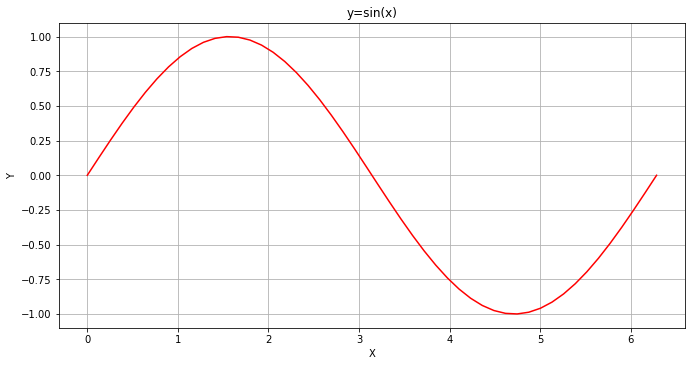

In [11]:
base_colors = ['b', 'g', 'r', 'c', 'm' ,'y', 'k', 'w']

def draw_figure_w_toolbar(canvas, fig, canvas_toolbar):
    if canvas.children:
        for child in canvas.winfo_children():
            child.destroy()
    if canvas_toolbar.children:
        for child in canvas_toolbar.winfo_children():
            child.destroy()
    figure_canvas_agg = FigureCanvasTkAgg(fig, master=canvas)
    figure_canvas_agg.draw()
    toolbar = Toolbar(figure_canvas_agg, canvas_toolbar)
    toolbar.update()
    figure_canvas_agg.get_tk_widget().pack(side='right', fill='both', expand=1)


class Toolbar(NavigationToolbar2Tk):
    def __init__(self, *args, **kwargs):
        super(Toolbar, self).__init__(*args, **kwargs)


# ------------------------------- PySimpleGUI CODE

layout = [
    [sg.T('Graph: y=sin(x)')],
    [sg.B('Plot'), sg.B('Exit')],
    [sg.T('Controls:')],
    [sg.Canvas(key='controls_cv')],
    [sg.T('Figure:')],
    [sg.Column(
        layout=[
            [sg.Canvas(key='fig_cv',
                       # it's important that you set this size
                       size=(400 * 2, 400)
                       )]
        ],
        background_color='#DAE0E6',
        pad=(0, 0)
    )],
    [sg.B('Alive?')],
    [sg.Slider(orientation ='horizontal', key='colorSlider', range=(0,7))]

]

window = sg.Window('Graph with controls', layout)

while True:
    event, values = window.read()
    color_index_float = values['colorSlider']
    color_index = int(color_index_float)
    print(event, values)
    if event in (sg.WIN_CLOSED, 'Exit'):  # always,  always give a way out!
        break
    elif event is 'Plot':
        # ------------------------------- PASTE YOUR MATPLOTLIB CODE HERE
        plt.figure(1)
        fig = plt.gcf()
        DPI = fig.get_dpi()
        # ------------------------------- you have to play with this size to reduce the movement error when the mouse hovers over the figure, it's close to canvas size
        fig.set_size_inches(404 * 2 / float(DPI), 404 / float(DPI))
        # -------------------------------
        x = np.linspace(0, 2 * np.pi)
        y = np.sin(x)
        plt.plot(x, y, base_colors[color_index])
        plt.title('y=sin(x)')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid()

        # ------------------------------- Instead of plt.show()
        draw_figure_w_toolbar(window['fig_cv'].TKCanvas, fig, window['controls_cv'].TKCanvas)

window.close()